<a href="https://colab.research.google.com/github/karthikvijayakumar/EVA/blob/vijkar_development/Project%205/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I have chosen to work with [my code from Assignment 4](https://github.com/karthikvijayakumar/EVA/blob/master/Project%204/Assignment_4_4.ipynb) instead of code 8 from session 3 for this assignment

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Installing Keras and importing into current runtime environment

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist

Importing libraries and functions required for the program

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Loading the MNIST dataset. Note that this dataset comes with a ready made train and test set.

(60000, 28, 28)


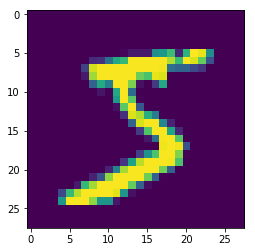

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Visualizing the first training image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Reshaping images from 28x28 to 28x28x1. This change needs to be done since convolution expects a 3 dimensional matrix.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Bringing the values of pixels to 0-255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Checking out the first ten labels on the training set. Note that these are numbers at this point. More importantly these numbers have an ordinality amongst them

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Converting the numerical labels to categorical values. This is important since the classes 0-9 are just different classes and have no inherent order amongst them ( i.e 7 is not a lesser class than 8 in any way with respect to digit classification )

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
X_test.shape[0]

10000

Seeing the categorical representation of the labels for the first ten training images

In [11]:
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# demonstrate effect on a single batch of samples
train_iterator = datagen.flow(X_train, Y_train, batch_size=128)
test_iterator = datagen.flow(X_test, Y_test, batch_size=128)
valid_iterator = datagen.flow(X_test, Y_test, batch_size=X_test.shape[0])
X_valid, Y_valid = valid_iterator.next()
y_valid = np.argmax(Y_valid, 1)

Data Generator mean=0.131, std=0.308


Image normalization

We create an ImageDataGenerator object that learns the mean and variance of the training dataset. The generator object finally gives an iterator that can be used while fitting the model.

We also create 
1. A test_iterator which can be used to run the model on the test images.
2. A valid_iterator
<br> The objective of this is 2 fold. First to serve as a the validation datset when training. Secondly to have a single dataset/object that retains order when later evaluating where our model makes errors. Iterator objects would shuffle the order of the images each time the iterator is created. It would be more convenient to have the whole validation/test images post normalization in a single object for use. Hence X_valid, Y_valid and y_valid are created.
<br>y_valid contains numerical class labels just like y_test. This would be useful at a later point in the notebook.

In [12]:
from keras.layers import Activation, BatchNormalization, Dropout
from keras import regularizers
dropout_rate = 0.1
reg_lambda = 0.01

model = Sequential()

# Convolution block 
model.add(Convolution2D(10, (3, 3), input_shape=(28,28,1), kernel_regularizer=regularizers.l2(reg_lambda), bias_regularizer = regularizers.l2(reg_lambda))) #3x3x1x10 kernel - 26x26x10 image - Receptive Field 3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))
model.add(Convolution2D(16, (3, 3), kernel_regularizer=regularizers.l2(reg_lambda), bias_regularizer = regularizers.l2(reg_lambda) )) # 3x3x10x16 kernel - 24x24x16 image - Receptive Field 5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

# Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer - 12x12x16 image - Receptive Field 10x10
model.add(Convolution2D(10, (1,1), kernel_regularizer=regularizers.l2(reg_lambda), bias_regularizer = regularizers.l2(reg_lambda))) # 1x1x16x8 kernel - 12x12x8 image - Receptive Field 10x10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

#Convolution block
model.add(Convolution2D(16, (3, 3), kernel_regularizer=regularizers.l2(reg_lambda), bias_regularizer = regularizers.l2(reg_lambda))) # 3x3x8x16 kernel - 10x10x16 image - Receptive Field 12x12
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))
model.add(Convolution2D(16, (3, 3), kernel_regularizer=regularizers.l2(reg_lambda), bias_regularizer = regularizers.l2(reg_lambda))) # 3x3x16x16 kernel - 8x8x16 image - Receptive Field 14x14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

# Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer - 4x4x16 image - Receptive Field 28x28
model.add(Convolution2D(10, (1,1), kernel_regularizer=regularizers.l2(reg_lambda), bias_regularizer = regularizers.l2(reg_lambda))) # 1x1x16x8 kernel - 4x4x10 image - Receptive Field 28x28
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

#Convolution block
model.add(Convolution2D(16, (3, 3), kernel_regularizer=regularizers.l2(reg_lambda), bias_regularizer = regularizers.l2(reg_lambda))) # 3x3x16x16 kernel - 2x2x16 image - Receptive Field 28x28
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

model.add(Convolution2D(10, (2, 2))) # 2x2x16x10 kernel - 1x1x10 image

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
__________

In [0]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

Compiling the model for training. Note the explicit setting of learning rate for the Adam optimizer.

In [15]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.1 * epoch), 10)

filepath="weights.iter4.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint, LearningRateScheduler(scheduler, verbose=1)]

model.fit_generator(train_iterator, steps_per_epoch=len(X_train)/128, epochs = 30, verbose=1, validation_data=(X_valid, Y_valid), callbacks = callbacks_list)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/468 [==============================] - 11s 24ms/step - loss: 0.6009 - acc: 0.9027 - val_loss: 2.0085 - val_acc: 0.3798

Epoch 00001: val_acc improved from -inf to 0.37980, saving model to weights.iter4.best.hdf5
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0027272727.
469/468 [==============================] - 7s 15ms/step - loss: 0.2050 - acc: 0.9647 - val_loss: 0.1660 - val_acc: 0.9748

Epoch 00002: val_acc improved from 0.37980 to 0.97480, saving model to weights.iter4.best.hdf5
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0025.
469/468 [==============================] - 7s 15ms/step - loss: 0.1782 - acc: 0.9689 - val_loss: 0.1781 - val_acc: 0.9682

Epoch 00003: val_acc did not improve from 0.97480
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0023076923.
469/468 [=====

After 30 epochs, the max validation accuracy reached was 99.05%. Note the added callback for the LR scheduler and the modified batch size.

This model contains the following changes on top of Assignent 4:

1. Image normalization
2. L2 regularization
3. Shifting the activation function to be after the batch normalization layer

This is lower than the previously achieved accuracy of 99.40%. With L2 regularization there is a decrease in the number of parameters the model has and hence has lower expressivity. With lower expressivity the model cant be as accurate and hence the best validation accuracy dropped. Chose the lambda for regularization after experimenting with 0.01 and 0.02. Lower values were preferred since with so few parameters we dont want to drive many of them to zero and also the results were better with 0.01.

Note:  The validation accuracy has dropped in this iteration in comparison with assignment 4 keeping the same number of epochs. With more epochs/longer training time the best validation accuracy may improve.

In [0]:
model.load_weights("weights.iter4.best.hdf5")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Loading the best model weights ( according to validation accuracty ) stored during the training phase

In [0]:
score = model.evaluate_generator( test_iterator, verbose=0, steps = X_test.shape[0]/128)

Evaluate the model on the testing dataset

In [18]:
print(score)

[0.06921846867203713, 0.9905]


Printing the score of the model on the testing dataset. The first number is the value of the loss function. The latter is the test accuracy. Note that the test accuracy shown here matches what was printed in the training logs.

In [19]:
model.evaluate_generator( train_iterator, verbose=0, steps = X_train.shape[0]/128)

[0.07020269436041514, 0.9884]

Evaluating the model on the training dataset to see what the achieved training accuracy is.

In [0]:
y_pred = model.predict(X_valid, verbose = 0)
y_pred_numeric_classes = np.argmax(y_pred, 1)

Computing the predicted classifications for the testing dataset. Using X_valid here instead of the test_iterator since test_iterator jumbles the order of the inputs and we need a consistent order to observe where the model is going wrong later on.

Also computing the numeric classes from the categorical representation

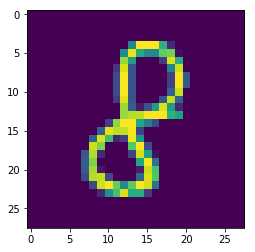

In [21]:
plt.imshow(X_valid[0][:,:,0])

In [22]:
print(y_pred[:9])
print(y_pred_numeric_classes)
print(Y_valid[:9])
print(y_valid[:9])

[[5.41918780e-06 4.41402991e-11 2.46513900e-06 5.16610541e-08
  1.05904547e-08 1.07264562e-08 7.82624170e-08 1.21268837e-11
  9.99991417e-01 6.51270454e-07]
 [1.06681291e-04 2.97430915e-08 1.04691852e-02 1.82281765e-05
  4.36003074e-06 2.66123311e-06 8.30081899e-06 6.03972561e-09
  9.89383638e-01 6.84062070e-06]
 [1.69895054e-06 2.27416774e-09 2.71380962e-08 1.82356068e-03
  2.50657109e-07 9.97943819e-01 9.99059703e-05 4.01146760e-09
  1.11258829e-04 1.94774020e-05]
 [9.09672622e-08 1.95773919e-06 3.60989041e-04 9.99609530e-01
  3.00958192e-08 3.39680332e-06 9.29318622e-10 3.86957572e-06
  1.91733252e-05 1.13751207e-06]
 [1.56139109e-07 4.46018248e-06 6.43691578e-07 6.91952152e-07
  1.01612407e-07 7.87298177e-07 4.07734003e-12 9.96532917e-01
  2.66898451e-06 3.45766009e-03]
 [2.58317534e-10 3.50317174e-14 4.38616671e-10 1.39679059e-08
  1.01987906e-04 1.17701283e-07 1.29068208e-12 1.06229800e-06
  5.11295730e-06 9.99891639e-01]
 [3.98575887e-03 4.71482853e-09 1.13817532e-06 2.34921390e

Comparing the labels computed by our model and that given in the dataset.

Note that for the first element, the target label in the validation dataset is 2. The output by the model, is in the categorical form described earlier. One can see that first output peaks at index 2 which corresponds to the digit 2.

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

Copying the layers in a dict for visualization in the next step

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

Predefined function for visualizing how an image is processed by a particular layer in the network.

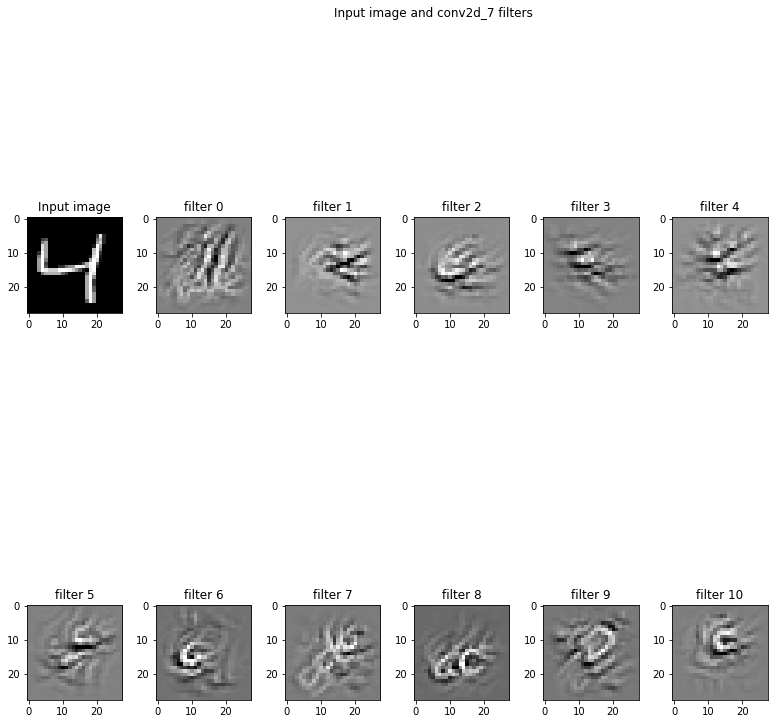

In [25]:
vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), layer_name = 'conv2d_7')

Visualization of the 7th convolution layer ( 3x3x10x32 kernel )

# Image gallery of misclassified test images

First lets observe for how many data points are our predictions off. Our validation accuracy is 99.05% hence out of 10k validation images, our predictions should be off for less than 100 ( 1% of 10k ) of them

In [26]:
misclassified_image_ids = np.argwhere( y_valid != y_pred_numeric_classes ).flatten()
misclassified_image_ids.size

95

In [0]:
gallery_choices = np.random.choice( misclassified_image_ids, 25 )

Taking a random subset of size 25 from the misclassified images.

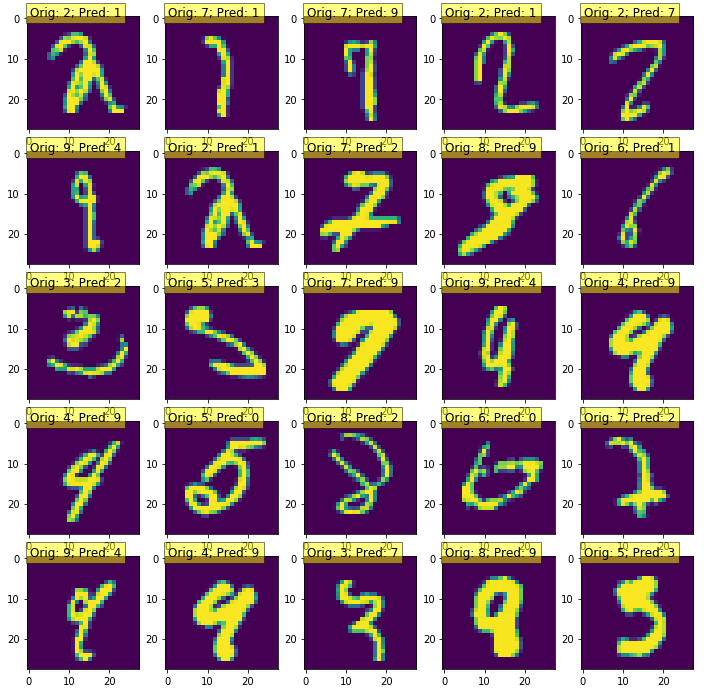

In [28]:
fig, ax = plt.subplots(5,5, figsize = (12,12))  
for i in range(0,5):
    for j in range(0,5):        
        index = i*5 + j
        ax[i][j].imshow(X_valid[gallery_choices[index]][:,:,0])                     
        text_msg = 'Orig: ' + str(y_valid[gallery_choices[index]]) + '; Pred: ' + str(y_pred_numeric_classes[gallery_choices[index]])
        ax[i][j].text(0.25, 0.25, text_msg,  horizontalalignment='left',verticalalignment='bottom', bbox=dict(facecolor='yellow', alpha=0.5), fontsize = 12)

The above is a plot of 25 images which were misclassified by the model. A couple of observations:

For most images above the prediction by the model seems understandable. For example the top left image, does indeed resemble a 2 except for the lack of a curve in the upper section, the image immediate right of it is largely a straight line and hence seems fair to be classified a 1. For these cases where the model's prediction seems understandable the model isnt able to find the right class but we humans are since the models inside our head are sophisticated enough to discern minor details but the model with its constraints on #params isnt able to notice that level of detail.

There are a few examples where the model is outrightly incorrect. For example, the misclassification of a 2 as a 6 in the last row, 7 as a 2 in the 3rd row, 7 as a 1 in the 3rd row, 9 as a 8 in the 4th row etc. For these cases we need to dwell deeper in to what each kernel and layer is doing to understand the classification was incorrect.

Given there are only 95 misclassifications, we could plot all of them instead of just a subset of 25. Plot of all the 95 misclassified images below

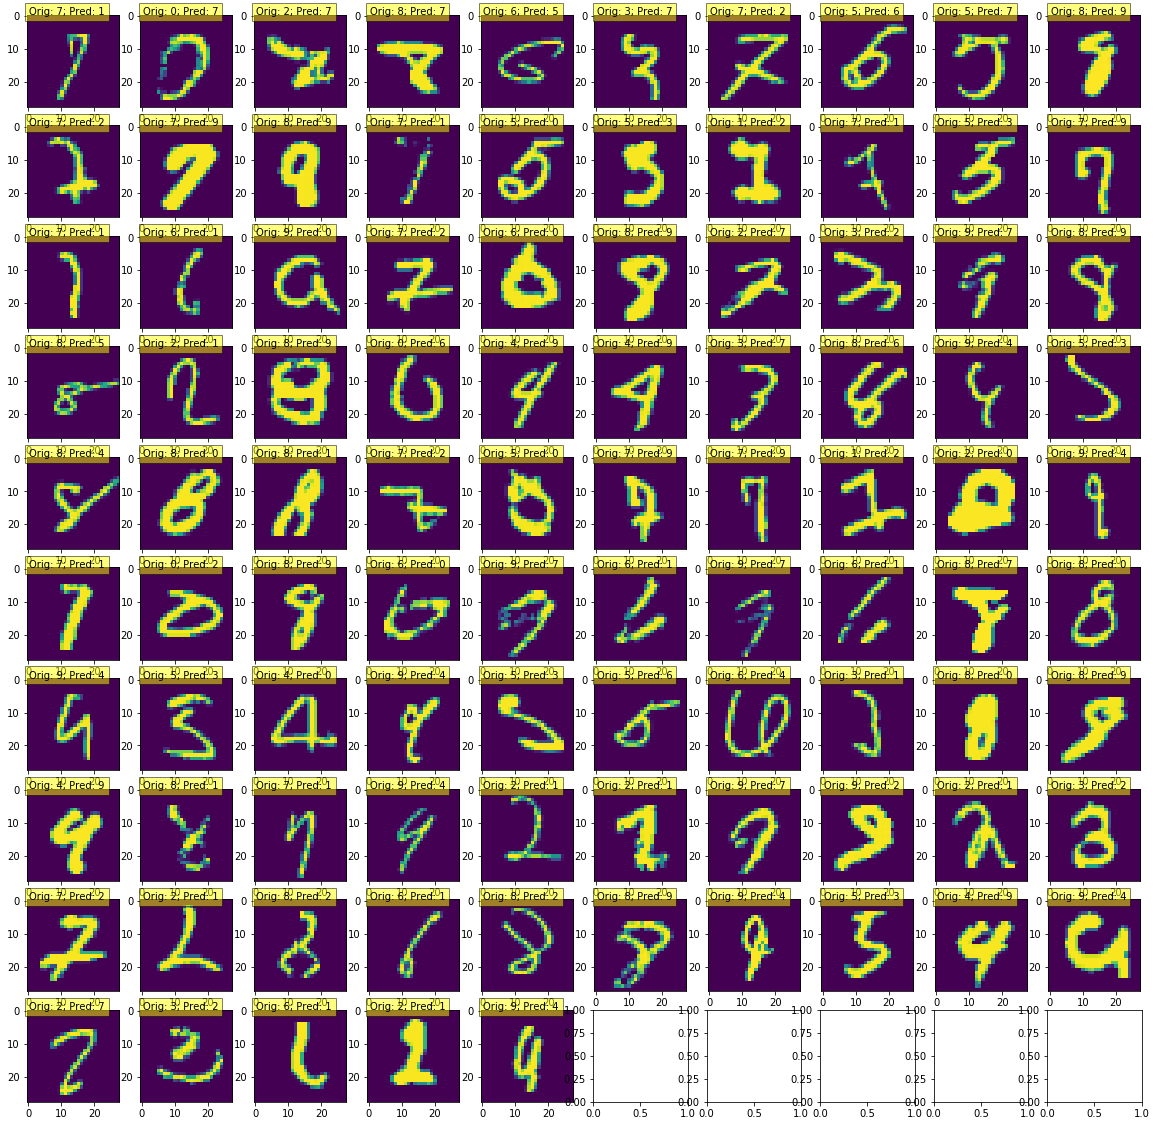

In [29]:
fig, ax = plt.subplots(10,10, figsize = (20,20))
for i in range(0,10):
    for j in range(0,10):        
        index = i*10 + j
        if(index < misclassified_image_ids.size):
            ax[i][j].imshow(X_valid[misclassified_image_ids[index]][:,:,0])                     
            text_msg = 'Orig: ' + str(y_valid[misclassified_image_ids[index]]) + '; Pred: ' + str(y_pred_numeric_classes[misclassified_image_ids[index]])
            ax[i][j].text(0.25, 0.25, text_msg,  horizontalalignment='left',verticalalignment='bottom', bbox=dict(facecolor='yellow', alpha=0.5), fontsize = 10)